In [1]:
! pip install easyocr 

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.9 MB 1.6 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.9 MB 1.6 MB/s eta 0:00:01
   --------------------- ------------------ 1.6/2.9 MB 1.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.9 MB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.9 MB 1.4 MB/s eta 0:00:01
   -------------------------------- ------- 2.4/2.9 MB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 2.6/2.9 MB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 2.6/2.9 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 1.2 MB/s eta 0:00:00
   ------------------------------

In [2]:
import easyocr as ocr 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
ocr_motor = ocr.Reader(['en', 'tr'])  
# Reader classının içinde detect(yazıyı tespit eder) ve recognizing(yazıyı tanır) modülleri yer alır. 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [25]:
with open('images/plaka2.PNG', 'rb') as f:
  img = f.read()

img_ham = np.fromstring(img, np.uint8)
img_cv2 = cv2.imdecode(img_ham, cv2.IMREAD_COLOR) # renki bir resim olarak decode edildi 

C:\Users\havva\AppData\Local\Temp\ipykernel_17160\1577902596.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img_ham = np.fromstring(img, np.uint8)


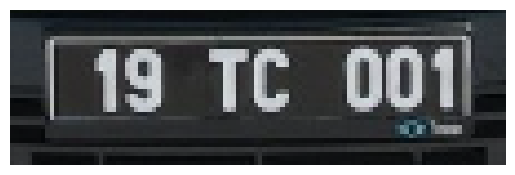

In [26]:

# OpenCV, BGR formatında okur, bunu RGB formatına çevirmek gerekli
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Matplotlib ile görüntüyü göster
plt.imshow(img_rgb)
plt.axis('off')  # Eksenleri gizle
plt.show()

In [27]:
plate = ocr_motor.readtext(img)  # resmin ilk hali verilir 

In [15]:
# resim içindeki yazılar yazdırılır, sayısal olarak ama listenin içinde elde etmemiz gereken yazılar da yer alır ve ayrıca ne kadar doğrulukla bildiği de yazılmış olur.
for letters in plate:
    print(letters)

([[9, 11], [49, 11], [49, 49], [9, 49]], '34', 0.9990672491184)
([[69, 17], [115, 17], [115, 53], [69, 53]], 'BC', 0.7944277901912162)
([[18, 39], [95, 39], [95, 87], [18, 87]], '6585 _', 0.6429009876424504)


In [29]:
# resimdeki yazıları yan yana yazdırır
result = ' '.join([letters[1] for letters in plate])
print(result)

19 TC007


In [13]:
# resimdeki yazıları alt alta  yazdırır
result = '\n'.join([letters[1] for letters in plate])
print(result)

34
BC
6585 _


In [12]:
# resimdeki yazıları dikdörtgen içerisine alıyor 
for letters in plate:
    cv2.rectangle(img_cv2, [int(letters[0][0][0]), int(letters[0][0][1])], [int(letters[0][2][0]), int(letters[0][2][1])], (0, 0, 255), 2) # dikdörtgen içine alıyoruz, köşeler ve hangi renk olduğu ve kalınlık belirlenir 

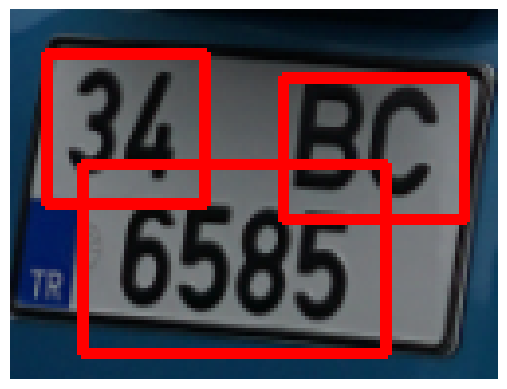

In [14]:

# OpenCV, BGR formatında okur, bunu RGB formatına çevirmek gerekli
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Matplotlib ile görüntüyü göster
plt.imshow(img_rgb)
plt.axis('off')  # Eksenleri gizle
plt.show()

# DATABASE'E KAYDETME

In [38]:
import easyocr as ocr 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [39]:
ocr_motor = ocr.Reader(['en', 'tr'])  
# Reader classının içinde detect(yazıyı tespit eder) ve recognizing(yazıyı tanır) modülleri yer alır. 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [40]:
with open('images/plaka2.PNG', 'rb') as f:
  img = f.read()

img_ham = np.fromstring(img, np.uint8)
img_cv2 = cv2.imdecode(img_ham, cv2.IMREAD_COLOR) # renki bir resim olarak decode edildi 

C:\Users\havva\AppData\Local\Temp\ipykernel_8200\1577902596.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img_ham = np.fromstring(img, np.uint8)


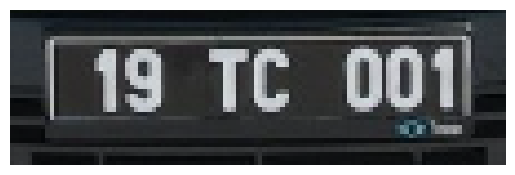

In [41]:
# OpenCV, BGR formatında okur, bunu RGB formatına çevirmek gerekli
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Matplotlib ile görüntüyü göster
plt.imshow(img_rgb)
plt.axis('off')  # Eksenleri gizle
plt.show()

In [42]:
plate = ocr_motor.readtext(img)  # resmin ilk hali verilir 

In [47]:
import sqlite3

# Veritabanına bağlanma (dosya yoksa oluşturulur)
conn = sqlite3.connect('database/plate_database2.db')
c = conn.cursor()

# Tabloyu oluşturma
c.execute('''
    CREATE TABLE IF NOT EXISTS plakalar (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Plate TEXT NOT NULL
    )
''')

conn.commit()


In [48]:
# Plaka metnini birleştirip veritabanına eklemek
plaka_metni = ' '.join([letters[1] for letters in plate])
plaka_metni

'19 TC007'

In [49]:
# Veriyi tabloya ekleme
c.execute("INSERT INTO plakalar (Plate) VALUES (?)", (plaka_metni,))

# Değişiklikleri kaydetme
conn.commit()

print("Plaka başarıyla veritabanına kaydedildi!")

Plaka başarıyla veritabanına kaydedildi!


In [50]:
import sqlite3

# Veritabanına bağlanma
conn = sqlite3.connect('database/plate_database.db')
c = conn.cursor()

# Veritabanındaki tüm plakaları sorgulama
c.execute("SELECT * FROM plakalar")

# Sonuçları çekme ve ekrana yazdırma
rows = c.fetchall()

for row in rows:
    print(row)

# Bağlantıyı kapatma
conn.close()


(1, '19 TC007')
